## Classification Tree

Decision Tree will be dividing the outputs based on the features available in the dataset
1. When it is dividing any features into categories, its a classification tree
    - If a person wants to learn about machine learning, check statquest else checkout recent movies
3. When it divides the output into some numberic values, its a regression tree
    - If a mouse eats a special diet, it will be between 150mm and 180mm long else between 120 and 140mm long
4. The very top of the tree is called root node or just root
5. The internal arrows are called branches or internal nodes
6. The tip of the tree is called leaf nodes or leaves

### How it works ?

1. The trees will be constructed based on the feature and divides it until it end
2. There will be n trees from n features
3. To get what tree should be picked, we will be using some metrics like Gini Impurity, Entropy or Information gain
4. Gini Impurity is something that is more popular and straight forward to calculate
5. The formula for calculating the Gini Impurity for categorical variable
    - 1 - (probability of class 1)<sup>2</sup> - (probability of class 2)<sup>2</sup>
    - The same formula should be applied for False as well

1. In case of numerical variable, the calculation will be different
2. The values in the features should be sorted
3. The averages on the adjacent values should be calculated
4. Then a tree should be constructed based on > and < with the adjacent averages and the class counts need to be determined on the same formula mentioned above
5. This should be repeated for all the adjacent averages and the value with lowest Gini Impurity should be picked up as the Gini Impurity of the feature, if there is tie, its up to us to pick any one of them

1. If the count is not similar between True and False, we need to calculate the weighted Gini Impurity
2. Total Gini Impurity = weighted averages of Gini Impurity for leaves in case of categorical variable
    - (Count in Leaves / total count on all the leaves * Gini Impurity we have got for each leaf)
    - This should be repeated across all the leaves and summed up
3. This will be further splitted down until we get the pure leaves
4. Based on the final tree, we will need to determine the flow based on the conditions
5. Now when new input arrives, we can just implement them in trees and find out the output for classification problem

1. There may be some possibilities that pure leave contains less number of data that could possibly overfit the data
2. In Such cases, we can prune the tree i.e limiting the depth to only some extent
3. In the impure leave, the class with the high value will be selected as the output
4. To decide the depth of the tree, cross validation needs to be performed
5. The one with the good accuracy will be picked out of cross validation

### Missing Data or Too Much Data

1. If there are features that never gives us the pure split, those will be ignored from the tree
2. This is a type of automatic feature selection
3. There may be cases where there are missing values
    - The missing values can be handled using modes
    - Perform linear regression with the highly correlated variabe incase of numerical variable
    - The numerical variable can also be replaced with mean/median

## Regression Tree

1. Imagine a scenario where a new drug is discovered to recover common cold
2. There may be chances that higher the dosage, higher the effectiveness
    - In this case, we can easily use linear regression
3. In other cases, there may be chances that the dosage is effective with medium dosage and the effectiveness reduces after some point of dosage
4. In this case, the regression tree can be used
5. It will be used based on the adjacent average method

### When can we use it ?

1. When there is simple dataset like only one independent variable, it will be easy to calculate just by looking at the graph
2. When there are more than one independent features, regression trees should be useful
3. Steps involved in building a regression tree
    - Start with first two observations & calculate their mean
    - Divide two observations by calculating effectiveness mean (< 3)
    - If the effectiveness is predicting the same value, leave it
    - Otherwise, calculate the residuals on the right side
    - Repeat by dividing the consequent 2 dosages(1:2, 2:3, 3:4 etc) and the dosage split with the least SSR will be picked up
4. Repeat step 3 in the subsequent branches
5. The split should be continued until we end up with only one observation or group of observations have the same value in y-axis

### Avoid Overfitting

1. The overfitting occurs when all the train data got fitted very accurately
2. This should be resulting in low bias and high variance
3. Hence, it can be avoided by determining the minimum number of observations to split

### Feature selection

1. The root is selected for the feature that has less SSR
2. And this repeats in the subsequent divisions

### Pruning

1. There are several methods for pruning
    - Our focus is cost complexity pruning a.k.a weakest link pruning
2. The main idea behind pruning is to prevent the overfitting of the training data
3. We need to decide which level of pruning is necessary
4. Cost complexity pruning helps us here
5. There are several steps involved in the cost complexity pruning

### Cost Complexity Pruning

1. Calculate the SSR for each tree after pruning
2. The SSR will be increasing as we go on pruning the levels of the tree which is expected
3. Hence there needs some penalty to adjust the SSR which is tree penalty along with the terminal, tree score is
    - alpha * T
    - Where alpha is a tuning parameter that we get during cross validation
    - T is the number of leaves
4. Therefore, the more leaves, the more penalty and the value for alpha makes a difference in the choice of the subtree
5. We need to decide the which should be the best value for alpha

1. The alpha value is determined with the help of K-Fold cross validation

## Python Implementation

### Imports

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np

In [3]:
iris = load_iris()

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Create Dataframe

In [24]:
iris_train_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [25]:
iris_test_df = pd.DataFrame(data=iris.target, columns=["species"])

In [26]:
iris_train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
iris_test_df["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

### Split the data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(iris_train_df, iris_test_df)

In [30]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
144,6.7,3.3,5.7,2.5
100,6.3,3.3,6.0,2.5
83,6.0,2.7,5.1,1.6
112,6.8,3.0,5.5,2.1
26,5.0,3.4,1.6,0.4


In [31]:
y_train.head()

,species
144,2
100,2
83,1
112,2
26,0


### Train the data

In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
dt.score(X_test, y_test)

0.9736842105263158

### Visualize the tree

[Text(0.4, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.663\nsamples = 112\nvalue = [38, 32, 42]'),
 Text(0.3, 0.7857142857142857, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.35, 0.8571428571428572, 'True  '),
 Text(0.5, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.491\nsamples = 74\nvalue = [0, 32, 42]'),
 Text(0.45, 0.8571428571428572, '  False'),
 Text(0.4, 0.6428571428571429, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.6, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.4, 0.5, 'x[2] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.2, 0.21428571428571427, 'x[2] <= 4.95\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.21428571428571427, 'gini

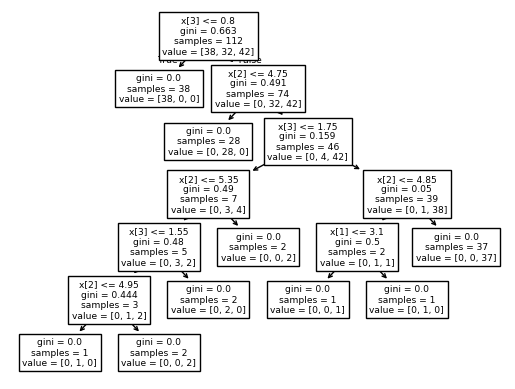

In [38]:
plot_tree(dt)

### Validate the tree

In [48]:
cross_val_score(dt, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

## Python Implementation (Regression)

### Imports

In [61]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor

### Fetch the data

In [52]:
ch = fetch_california_housing()

In [53]:
print(ch.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [56]:
ch.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [57]:
ch.target_names

['MedHouseVal']

### Create Pandas Dataframe

In [58]:
ch_features = pd.DataFrame(data=ch.data, columns=ch.feature_names)
ch_target = pd.DataFrame(data=ch.target, columns=ch.target_names)

### Split the data

In [60]:
X_train, X_test, y_train, y_test = train_test_split(ch_features, ch_target)

### Train the data

In [62]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
dtr.score(X_test, y_test)

0.5908677857476922

In [65]:
plot_tree(dtr)

[Text(0.6410545002943485, 0.9871794871794872, 'x[0] <= 5.047\nsquared_error = 1.339\nsamples = 15480\nvalue = 2.073'),
 Text(0.35761077687927323, 0.9615384615384616, 'x[0] <= 3.074\nsquared_error = 0.839\nsamples = 12178\nvalue = 1.735'),
 Text(0.4993326385868109, 0.9743589743589745, 'True  '),
 Text(0.16544752132596133, 0.9358974358974359, 'x[2] <= 4.307\nsquared_error = 0.563\nsamples = 5825\nvalue = 1.356'),
 Text(0.07494006018080393, 0.9102564102564102, 'x[0] <= 2.217\nsquared_error = 0.678\nsamples = 2418\nvalue = 1.624'),
 Text(0.03593304992905346, 0.8846153846153846, 'x[2] <= 3.535\nsquared_error = 0.581\nsamples = 1272\nvalue = 1.367'),
 Text(0.018366361207464713, 0.8589743589743589, 'x[5] <= 3.14\nsquared_error = 0.781\nsamples = 522\nvalue = 1.694'),
 Text(0.009995837733220112, 0.8333333333333334, 'x[6] <= 37.91\nsquared_error = 1.052\nsamples = 254\nvalue = 1.963'),
 Text(0.005527667845888548, 0.8076923076923077, 'x[6] <= 34.005\nsquared_error = 1.054\nsamples = 227\nvalue =

Error in callback <function _draw_all_if_interactive at 0x00000295A8613E20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000295A8634EE0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [66]:
dtr.predict(X_test)

array([2.831, 1.247, 1.008, ..., 1.281, 1.688, 3.02 ])

In [68]:
cross_val_score(dtr, X_train, y_train, cv=10)

array([0.58467173, 0.57109928, 0.59500034, 0.62873468, 0.61382944,
       0.57399636, 0.50636718, 0.64209014, 0.64123022, 0.6300432 ])